# **Conjunto de dados sobre Doenças Cardíacas**

Este conjunto de dados de doenças cardíacas foi adquirido de um dos hospitais multiespecializados da Índia. Mais de 14 características comuns o tornam um dos conjuntos de dados de doenças cardíacas disponíveis até agora para fins de pesquisa. Este conjunto de dados consiste em 1.000 assuntos com 12 recursos. Este conjunto de dados será útil para construir a detecção de doenças cardíacas em estágio inicial, bem como para gerar modelos preditivos de aprendizado de máquina.

O objetivo é fazer a análise exploratória dos dados para conhecer suas variáveis e identificar as variáveis mais forte que podem colaborar para a definição se o paciente poderá ser cardíaco ou não.

O conjunto de dados é supervisionado, já que existe a coluna target, que é a que nos diz se o paciente tem doença cardíaca ou não. Ou seja, num possível aprendizado de máquina ele irá aprender uma regras de acordo com os algoritmos utilizados com base no resultado target.

Me leva a acreditar que as pessoas com mais idade podem ser as que mais incidem doenças cardíacas. Vamos descobrir .



---



---


## Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import plotly as pt
import seaborn as sns
import plotly.express as px

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/robsongrego/Pos_graduacao_puc/main/Cardiovascular_Disease_Dataset.csv')
dataset

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1


### Conhecendo os dados

In [3]:
#colunas
print(f'Colunas:  {list(dataset.columns)} ')

Colunas:  ['patientid', 'age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels', 'target'] 


### Colunas ( Atributos )


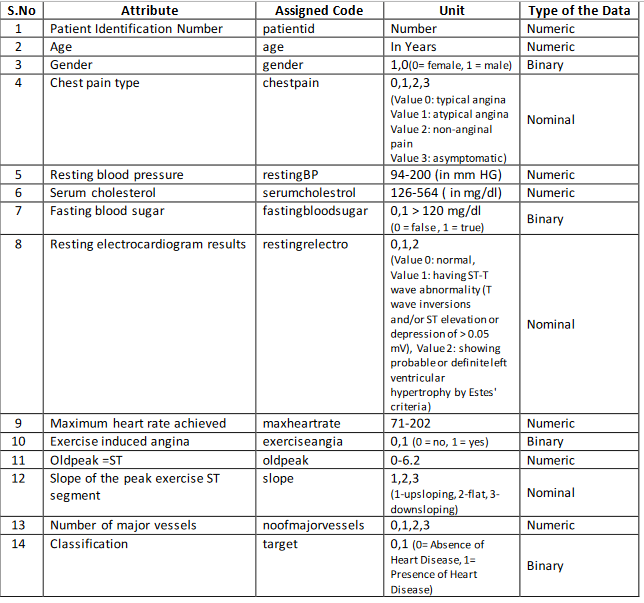

patientid = identificação do paciente

age = idade do paciente

Gender = Gênero - 1,0(0= female, 1 = male)

chestpain = tipo de dor no peito
            [0,1,2,3
            (Value 0: typical angina
            Value 1: atypical angina
            Value 2: non-anginal
            pain
            Value 3: asymptomatic)]

restingBP = Pressão arterial em repouso

serumcholestrol = colesterol sérico

fastingbloodsugar = Açúcar no sangue em jejum , Glicose

restingrelectro = Resultados do eletrocardiograma em repouso

exerciseangia = Angina induzida por exercício

maxheartrate = Frequência cardíaca máxima alcançada

oldpeak = pico antigo

slope = Inclinação do pico do exercício ST segmento

noofmajorvessels = Número de vasos principais

target = Se 1 nos mostra que a pessoa tem doença cardíaca , se 0 não tem.







## Dataset

In [4]:
dataset.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [5]:
print(f' Existem {dataset.shape[0]} linhas/instâncias e {dataset.shape[1]} Colunas/Variáveis, agora que retirei a coluna identificação do paciente ')

 Existem 1000 linhas/instâncias e 14 Colunas/Variáveis, agora que retirei a coluna identificação do paciente 


In [6]:
dataset[dataset['target']==1].count() # temos 580 pessoas com doenças cardíacas nesse conjunto de dados

patientid            580
age                  580
gender               580
chestpain            580
restingBP            580
serumcholestrol      580
fastingbloodsugar    580
restingrelectro      580
maxheartrate         580
exerciseangia        580
oldpeak              580
slope                580
noofmajorvessels     580
target               580
dtype: int64

In [7]:
dataset[dataset['target']==0].count() # Por eliminaçção temos 420 pessoas sem doenças cardíacas nesse conjunto de dados

patientid            420
age                  420
gender               420
chestpain            420
restingBP            420
serumcholestrol      420
fastingbloodsugar    420
restingrelectro      420
maxheartrate         420
exerciseangia        420
oldpeak              420
slope                420
noofmajorvessels     420
target               420
dtype: int64



---



---


## Formato e limpeza

### Dados duplicados

In [8]:
# dados duplicados
dataset.duplicated().sum() # por se tratar em um conjunto relativamente pequeno, não apresentou dados duplicados

0

### Dados nulos


In [9]:
# numeros nulos
dataset.isna().sum() # por se tratar em um conjunto relativamente pequeno, não apresentou dados nulos

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [10]:
dataset.shape # dataset tem mil linhas e 14 colunas

(1000, 14)

### Tipos de dados

In [11]:

dataset.info()  # informações sobre os tipos de dados de cada variável

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [12]:
# Vamos retirar a coluna identificação do paciente, pois não agrega valor em nossas pesquisas
dataset.drop('patientid', axis = 1, inplace = True)

In [13]:
dataset.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1


### Resumo estatístico

In [14]:
dataset.describe() # este método nos retorna um resumão interessante de dados estatísticos

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


Resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes).

In [15]:
dataset.agg(['min','max','median','mean','std' ,'count']) # o agg ou agregate nos permite escolher as variáveis estatísticas que queremos

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
min,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000
median,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
mean,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000




---



---


## **Perguntas sobre o conjunto de dados**



---



---


### Qual percentual de cardíacos no dataset  ?

In [16]:
percentage_heart_disease = (dataset['target'].sum() / len(dataset)) * 100 # proporção dos pacientes com doenças cardíacas
print(f"Percentual das pessoas com doenças cardíacas : {percentage_heart_disease:.2f}%")

Percentual das pessoas com doenças cardíacas : 58.00%




---



---


### Qual é a amplitude de idade dos pacientes do dataset ?

In [17]:
print(f"As idades dos pacientes dataset vão de {dataset['age'].min()} a {dataset['age'].max()}.\n"
      f"Portanto, a amplitude é de {dataset['age'].max() - dataset['age'].min()}")

As idades dos pacientes dataset vão de 20 a 80.
Portanto, a amplitude é de 60




---



---


### Quantos homens e mulheres presentes nos dados ?

In [18]:
dataset['gender'].value_counts() # Os dados nos mostra que a quantidade de homens é predominante.

1    765
0    235
Name: gender, dtype: int64

In [19]:
dataset['gender'].value_counts(normalize=True)*100   # Podemos ver aqui percentualmente.

1    76.5
0    23.5
Name: gender, dtype: float64



---



---


### Qual é o tipo mais comum de dor no peito observado nos clientes ?

In [20]:
dataset['chestpain'].value_counts()  # contagem dos valores

0    420
2    312
1    224
3     44
Name: chestpain, dtype: int64

<Axes: title={'center': 'Contagem por tipo de dor no peito'}, xlabel='Tipo de dor', ylabel='Contagem'>

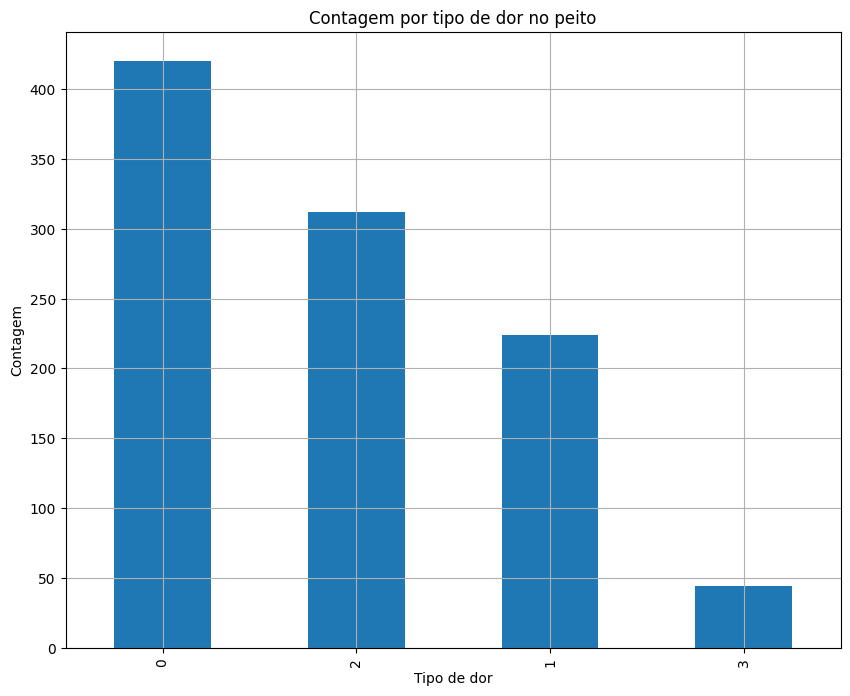

In [21]:
dataset['chestpain'].value_counts().plot(kind='bar' , title = 'Contagem por tipo de dor no peito' ,
                                         xlabel = 'Tipo de dor' , ylabel = 'Contagem' , figsize = (10,8),
                                         grid = True) # Vou experimentar gráficos em diferentes bibliotecas, esta é direto do pandas

In [22]:
# "brincando" com o plotly

px.histogram(dataset['chestpain'] ,
             title = 'Dores no peito' ,
             labels = {'count' : 'Contagem' , 'value' :'Tipos de dores'})





---



---





---



---


### Distribuição das pessoas por idade

Quantas pessoas por idade existem nesse conjunto ?

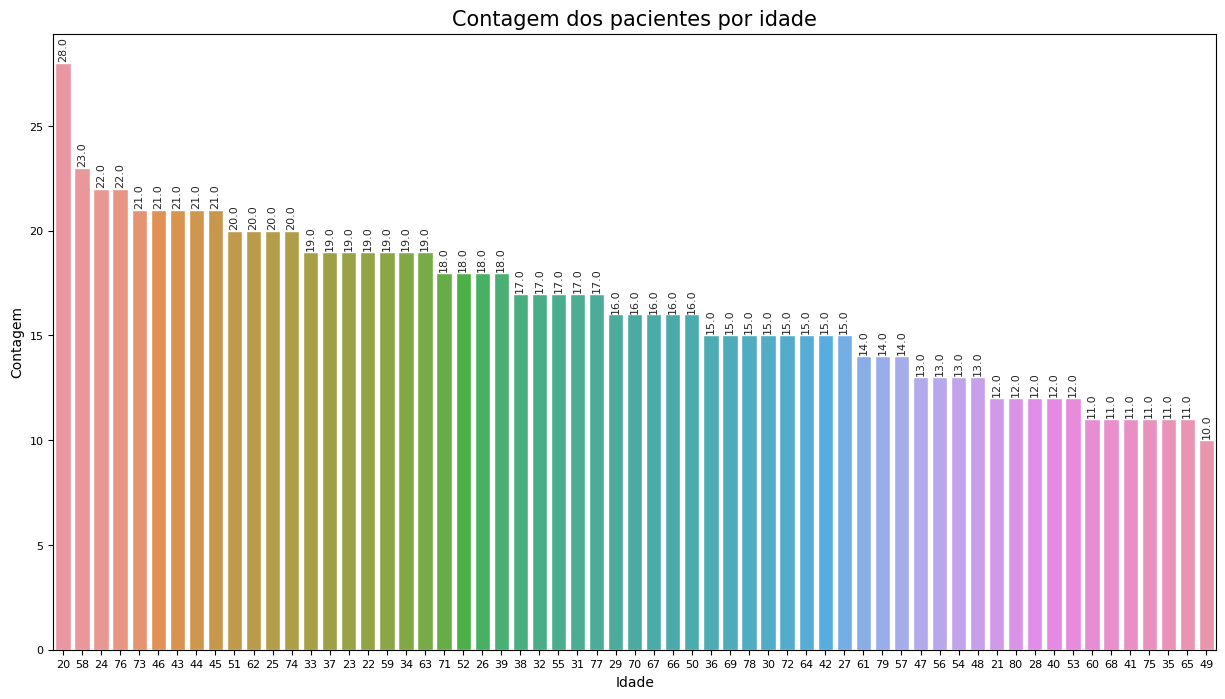

In [23]:
fig, ax = plt.subplots(figsize = (15,8)) # definindo figura
sns.set(style="whitegrid") # definindo estiloi
dataset_ordenado = dataset.copy() # atribuindo a uma variável para não modificar o dataset original
sns.countplot(x = 'age' , data = dataset_ordenado , order = dataset['age'].value_counts().index )
# Acima estou um plotando gráfico, ordenando pela contagem dos valores da coluna de idade

for p in ax.patches:  # repetição para rotular os dados
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points' ,
                rotation = 90 , fontsize = 8)

plt.xticks(fontsize=8) # eixo x
plt.yticks(fontsize=8) # definindo tamanho do eixo y
ax.set_xlabel('Idade') # label do eixo x
ax.set_ylabel('Contagem') # label do eixo y
ax.set_title('Contagem dos pacientes por idade' , fontsize = 15) # setando título


plt.show()



---



---


### Qual idade das pessoas que tem doença cardíaca ?

In [24]:
pacientes_doentes = dataset[dataset['target'] == 1] # nomeando um dataset para conhecermos os pacientes que tem doenças cardíacas

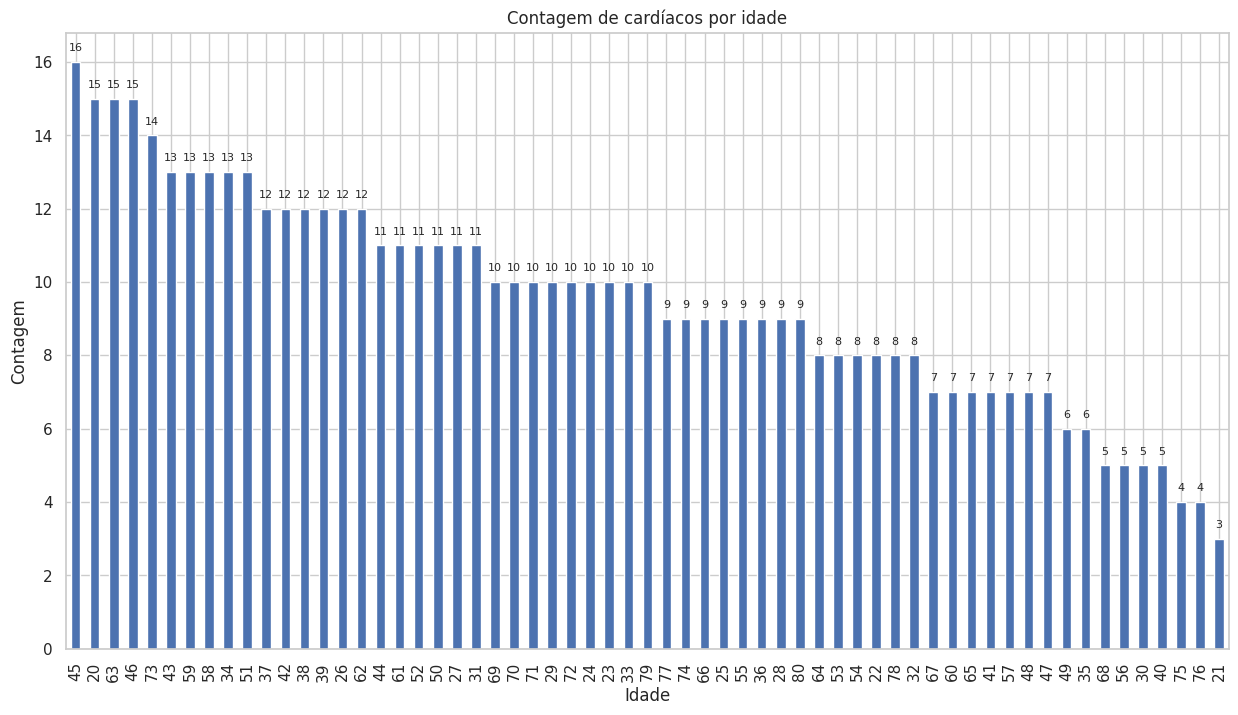

In [25]:
# Qual idade das pessoas que tem doença cardíaca ?
# utilizarei a funcionalidade do pandas para criar gráficos
ax = dataset[dataset['target'] == 1].groupby('age').count()['gender'].sort_values(
                              ascending=False).plot(kind='bar',figsize= (15,8),
                              grid = True, title = 'Contagem de cardíacos por idade',
                              xlabel= 'Idade', ylabel = 'Contagem'
                              )

for p in ax.patches:  # repetição para rotular os dados
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                fontsize= 8)



Aqui conseguimos ter a conclusão que das pessoas com mais problemas cardíacos se concentram na idade 45 anos, seguidas de 20 anos , 63 ,46, 73, e 43 .

Portanto no conjunto dá para se dizer que entre 43 anos e 46 há muita incidência de problemas.

Pessoas com 20 anos acredito haver um dado enviesado , já que também se encontram na maior quantidade de todo conjunto. Ou seja , de 28 pessoas com essa idade , 15 tem problemas cardíacos. Cerca de 53% da amostra

Como exemplo temos a idade 45 que das 21 pessoas do total do conjunto , 16 são cardíacos. Já aqui representa um percentual de 77 porcento.



---



---


### Contagem por genero das pessoas que tem doença cardíaca ?

In [26]:
dict_generos = {0 :'Feminino' , 1: 'Masculino'} # criando um dicionario para rotular os generos
generos = dataset[dataset['target'] == 1] # deixando apenas os dados com pacientes doentes,e  criando um df apenas para ele
generos['gender'] = generos['gender'].map(dict_generos) # mapeando a coluna generos
generos


<ipython-input-26-3bef9e1cf360>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,Masculino,2,171,0,0,1,147,0,5.3,3,3,1
3,43,Masculino,0,138,295,1,1,153,0,3.2,2,2,1
4,31,Masculino,1,199,0,0,2,136,0,5.3,3,2,1
5,24,Masculino,1,173,0,0,0,161,0,4.7,3,2,1
6,79,Masculino,2,130,240,0,2,157,0,2.5,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,77,Feminino,0,183,298,1,2,142,1,2.4,3,3,1
993,25,Feminino,1,197,0,0,0,195,0,1.0,3,0,1
995,48,Masculino,2,139,349,0,2,183,1,5.6,2,2,1
997,69,Masculino,0,156,434,1,0,196,0,1.4,3,1,1


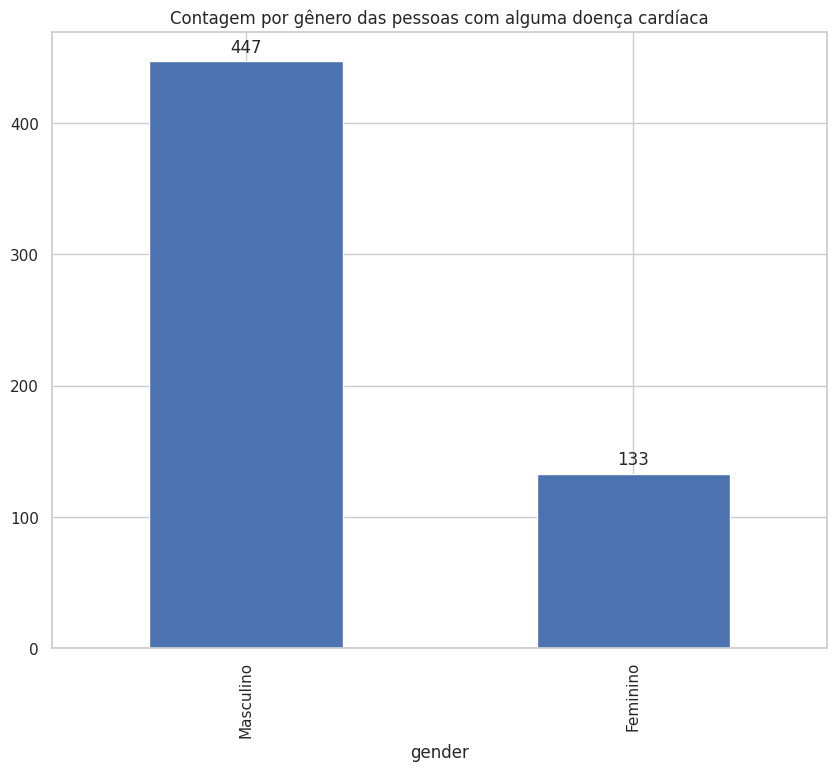

In [27]:
ax = generos[generos['target'] == 1].groupby('gender').count()['age'].sort_values(
                              ascending=False).plot(kind='bar',figsize= (10,8), grid = True ,
                              title = 'Contagem por gênero das pessoas com alguma doença cardíaca' )
                              # Utilizando o método do plot do pandas para mostrar os dados
for p in ax.patches:  # repetição para rotular os dados
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')



Vemos aqui que no dataset a presença da doença cardíaca é mais predominante nos homens

In [28]:
generos['gender'].value_counts()

Masculino    447
Feminino     133
Name: gender, dtype: int64

In [29]:
generos['gender'].value_counts(normalize=True)*100 # podemos ver que a relação não mudou muito do dataset inteiro para apenas o que mostra as pessoas doentes

Masculino    77.068966
Feminino     22.931034
Name: gender, dtype: float64

Podemos ver que a relação não mudou muito do dataset inteiro para apenas o que mostra as pessoas doentes



---



---


### Como varia o nível de colesterol entre os pacientes ?

In [30]:
q1 = dataset['serumcholestrol'].quantile(0.25) # primeiro quartil
q2 = dataset['serumcholestrol'].quantile(0.50) # mediana / segundo quartil
q3 = dataset['serumcholestrol'].quantile(0.75) # terceiro quartil
print(q1, q2 , q3)

235.75 318.0 404.25


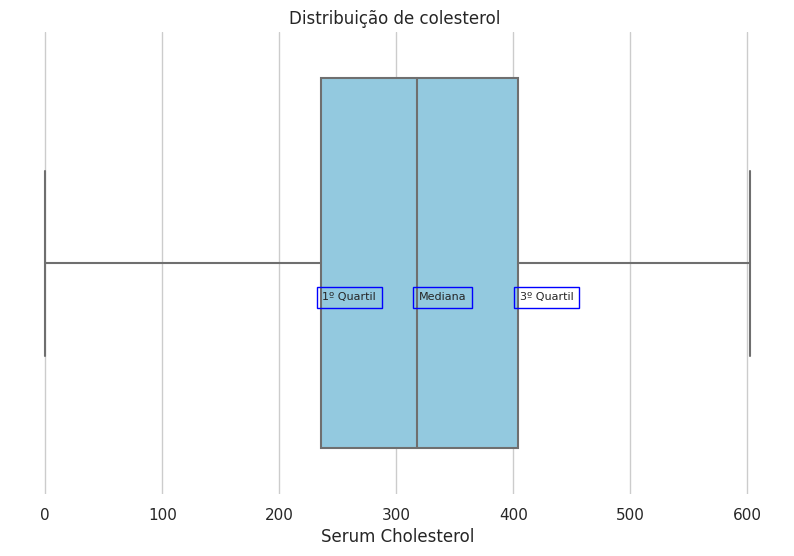

In [31]:

plt.figure(figsize=(10, 6))


sns.boxplot(x='serumcholestrol', data=dataset, color = 'skyblue' )
plt.title('Distribuição de colesterol ')
plt.xlabel('Serum Cholesterol')

sns.despine(top = True,
            right = True,
            left = True,
            bottom = True)

plt.text(q1 + 1 ,  0.08, '1º Quartil' , fontsize = 8 ,bbox= dict(facecolor='none', edgecolor='blue'))
plt.text(q2 + 1  , 0.08, 'Mediana' , fontsize = 8  ,bbox= dict(facecolor='none', edgecolor='blue'))
plt.text(q3 + 1  , 0.08, '3º Quartil' , fontsize = 8,bbox= dict(facecolor='none', edgecolor='blue'))


plt.show()

In [32]:
q1 = dataset['serumcholestrol'].quantile(0.25) # primeiro quartil
q2 = dataset['serumcholestrol'].quantile(0.50) # mediana / segundo quartil
q3 = dataset['serumcholestrol'].quantile(0.75) # terceiro quartil
print(q1, q2 , q3)

235.75 318.0 404.25


In [33]:
print('Dados dos nívels de colesterol\n -------------------------------- ')
print(f"Primeiro Quartil : {q1}\n")
print(f"Segundo Quartil e também a mediana : {q2}\n")
print(f"Terceiro Quartil : {q3}")

Dados dos nívels de colesterol
 -------------------------------- 
Primeiro Quartil : 235.75

Segundo Quartil e também a mediana : 318.0

Terceiro Quartil : 404.25


### Qual o percentual de pacientes com mais de 120 mg de glicose encontrada no sangue ?

A glicose é uma variável binária , sendo 1 com quantidade maior que 120 mg de açucar no sangue e 0 abaixo dessa faixa

In [34]:
len(dataset[(dataset['fastingbloodsugar']==1)]) # temos 296 pessoas com glicose alta

296

In [35]:
round((len(dataset[(dataset['fastingbloodsugar']==1)]) / len(dataset['fastingbloodsugar']))*100,3)

29.6

Com isso , descobrimos que 29 % os pacientes tem glicose alta



---



---


### E quantos desse total de diabéticos tem doenças cardíacas ?

In [36]:
len(dataset[(dataset['fastingbloodsugar']==1) & (dataset['target']==1)]) # Aqui coloco dois filtros, um com glicose alta e outro com doenças cardíacas = 1

240

In [37]:
# Comparando a quantidade total de diabéticos ( glicose alta ) com doenças cardíacas
((len(dataset[(dataset['fastingbloodsugar']==1) & (dataset['target']==1)])  ) / (len(dataset[(dataset['fastingbloodsugar']==1)]))) *100

81.08108108108108

Aqui descobrimos algo interessante, 81% dos diabéticos acabam se
tornando doentes cardíacos.



---



---


### Quais são os resultados predominantes do eletrocardiograma em repouso no conjunto de dados?

In [38]:
contagem = dataset['restingrelectro'].value_counts()
print(contagem)

0    454
1    344
2    202
Name: restingrelectro, dtype: int64


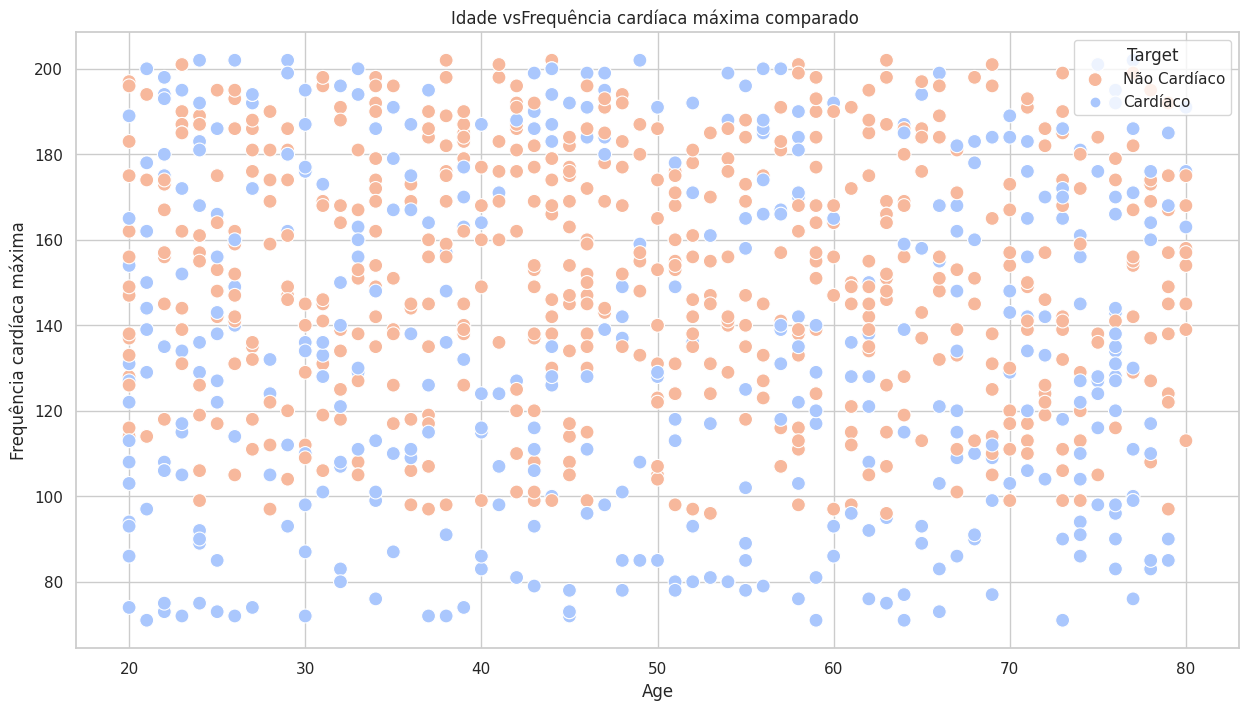

In [39]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='age', y='maxheartrate', hue='target', data=dataset, palette='coolwarm', s=100)
plt.title('Idade vsFrequência cardíaca máxima comparado ')
plt.xlabel('Age')
plt.ylabel('Frequência cardíaca máxima')
plt.legend(title='Target', loc='upper right', labels=['Não Cardíaco', 'Cardíaco'])
plt.show()



---



---


### Quantos pacientes tiveram angina induzida por exercício?



 Antes, o que é angina ?

 A angina é uma forte dor torácica causada pela diminuição do fluxo sanguíneo do coração. A restrição do sangue no coração também é conhecida como isquemia cardíaca.

 Essa condição é causada pela redução do calibre das artérias que levam o sangue ao coração. Na maioria das vezes, é acompanhada de uma sensação de aperto e queimação, que pode se espalhar para a mandíbula, braços, costas e pescoço.


In [40]:
dataset['exerciseangia'].unique() # variável binária

array([0, 1])

In [41]:
dataset['exerciseangia'].sum()  # 498 tiveram dores nos exerccícios estimulados

498

In [42]:
len(dataset[(dataset['exerciseangia'] == 1) & (dataset['target'] == 1)])

279

In [43]:
(len(dataset[(dataset['exerciseangia'] == 1) & (dataset['target'] == 1)]) / dataset['exerciseangia'].sum())*100

56.024096385542165

Cerca de 56.02% das pessoas que tem dores estimuladas por exercícios contém doenças cardíacas . O que nos leva algo perto da aleatoriedade de 50% . Então não parece uma variável forte para decisão.



---



---


### Distribuição da idade dos pacientes por gênero

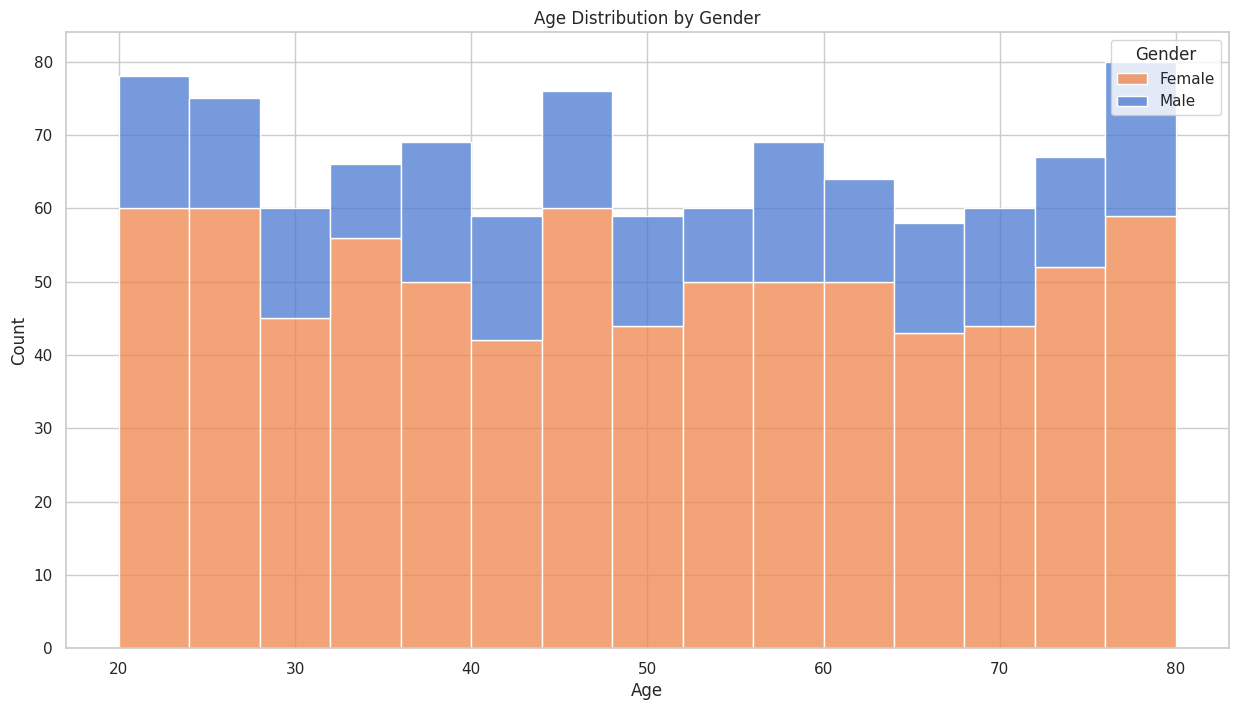

In [44]:
plt.figure(figsize=(15, 8))
sns.histplot(x='age', hue='gender', data=dataset, palette='muted', multiple='stack', bins=15)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])

plt.show()



---



---


Por curiosidade fui descobrir o paciente com maior idade do conjunto e a notícia maravilhosa é que não é cardíaco .

In [45]:
dataset.loc[dataset['age'].idxmax()]

age                   80.0
gender                 1.0
chestpain              1.0
restingBP            130.0
serumcholestrol      342.0
fastingbloodsugar      0.0
restingrelectro        0.0
maxheartrate         176.0
exerciseangia          1.0
oldpeak                2.5
slope                  0.0
noofmajorvessels       0.0
target                 0.0
Name: 102, dtype: float64



---



---


E a pessoa com menor pressão sanguínea ?


In [46]:
dado = dataset.loc[dataset['restingBP'].idxmin()]
print(f"Detalhes do paciente com menor pressão sanguínea:\n{dado}")

Detalhes do paciente com menor pressão sanguínea:
age                   40.0
gender                 1.0
chestpain              0.0
restingBP             94.0
serumcholestrol      229.0
fastingbloodsugar      0.0
restingrelectro        1.0
maxheartrate         115.0
exerciseangia          0.0
oldpeak                3.7
slope                  1.0
noofmajorvessels       1.0
target                 0.0
Name: 1, dtype: float64




---



---


### Existe alguma relação entre tipo de dor no peito e doença cardíaca ?

Lembrando que:

0,1,2,3
(Value 0: typical angina

Value 1: atypical angina

Value 2: non-anginal
pain

Value 3: asymptomatic)



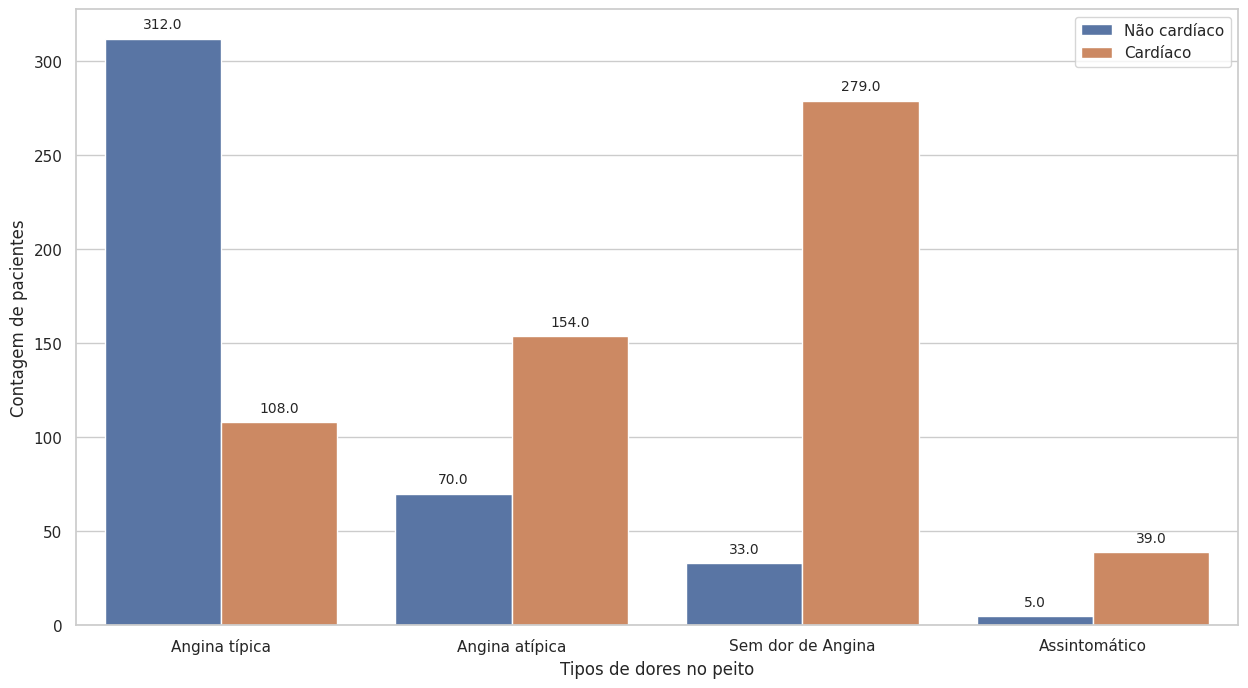

In [47]:
fig , ax = plt.subplots(figsize = (15,8))

ax = sns.countplot(x='chestpain' , data = dataset , hue = 'target')

ax.set_xlabel('Tipos de dores no peito')
ax.set_ylabel('Contagem de pacientes')

lista = list(dataset['chestpain'].unique())
lista.sort()

rotulos = ['Angina típica','Angina atípica','Sem dor de Angina', 'Assintomático']
plt.legend(labels =['Não cardíaco' , 'Cardíaco'])


for p in ax.patches:  # repetição para rotular os dados
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                fontsize = 10)

plt.xticks(range(len(lista)) , rotulos )

plt.show()

Nos mostra o resultado que as dores no peito não tem forte relação já que a que mais apresentou percentual de cardíacos é a o tipo 2 que é sem dor de angina.

O tipo 1 nos mostra que todos um pouco acima da aleatoriedade, sendo que a amostra do tipo um teve em seu dobro resultado com cardíacos.

### Qual é a distribuição dos valores de pico antigos para pacientes com doenças cardíacas?

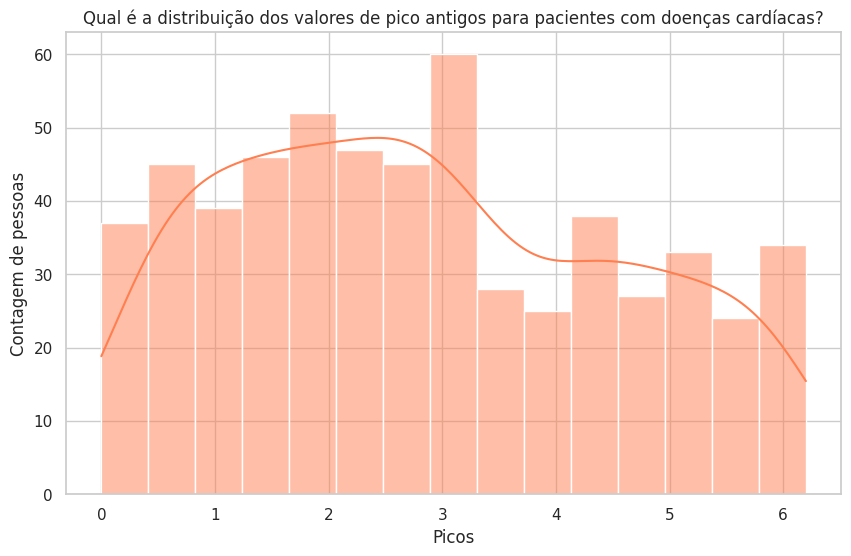

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(x='oldpeak', data=dataset[dataset['target'] == 1], bins=15, kde=True, color='coral')
plt.title('Qual é a distribuição dos valores de pico antigos para pacientes com doenças cardíacas?')
plt.xlabel('Picos')
plt.ylabel('Contagem de pessoas')
plt.show()

In [49]:
pacientes_doentes.describe().round(2)

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,580.00,580.00,580.00,580.00,580.00,580.00,580.00,580.00,580.00,580.00,580.00,580.00,580.0
mean,49.37,0.77,1.43,164.04,333.45,0.41,1.03,152.12,0.48,2.85,2.22,1.63,1.0
std,17.25,0.42,0.87,26.04,153.50,0.49,0.80,28.22,0.50,1.71,0.65,0.87,0.0
min,20.00,0.00,0.00,94.00,0.00,0.00,0.00,96.00,0.00,0.00,1.00,0.00,1.0
25%,35.00,1.00,1.00,143.00,241.00,0.00,0.00,133.00,0.00,1.40,2.00,1.00,1.0
50%,49.00,1.00,2.00,168.00,351.50,0.00,1.00,152.00,0.00,2.70,2.00,2.00,1.0
75%,63.00,1.00,2.00,187.00,456.25,1.00,2.00,175.00,1.00,4.30,3.00,2.00,1.0
max,80.00,1.00,3.00,200.00,602.00,1.00,2.00,202.00,1.00,6.20,3.00,3.00,1.0


### Pressão sanguínea em repouso

In [50]:
pressao_sanguinea = pacientes_doentes[['restingBP']]

In [51]:
moda = pressao_sanguinea['restingBP'].mode()[0]
mediana = pressao_sanguinea['restingBP'].median()
media = pressao_sanguinea['restingBP'].mean()

In [52]:
print(f'Moda : {moda}');
print(f'Mediana : {mediana}');
print(f'Média : {media.round(2)}');

Moda : 190
Mediana : 168.0
Média : 164.04


<ipython-input-53-e3c55625912e>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(80.0, 0, '80'),
 Text(100.0, 0, '100'),
 Text(120.0, 0, '120'),
 Text(140.0, 0, '140'),
 Text(160.0, 0, '160'),
 Text(180.0, 0, '180'),
 Text(200.0, 0, '200'),
 Text(220.0, 0, '220')]

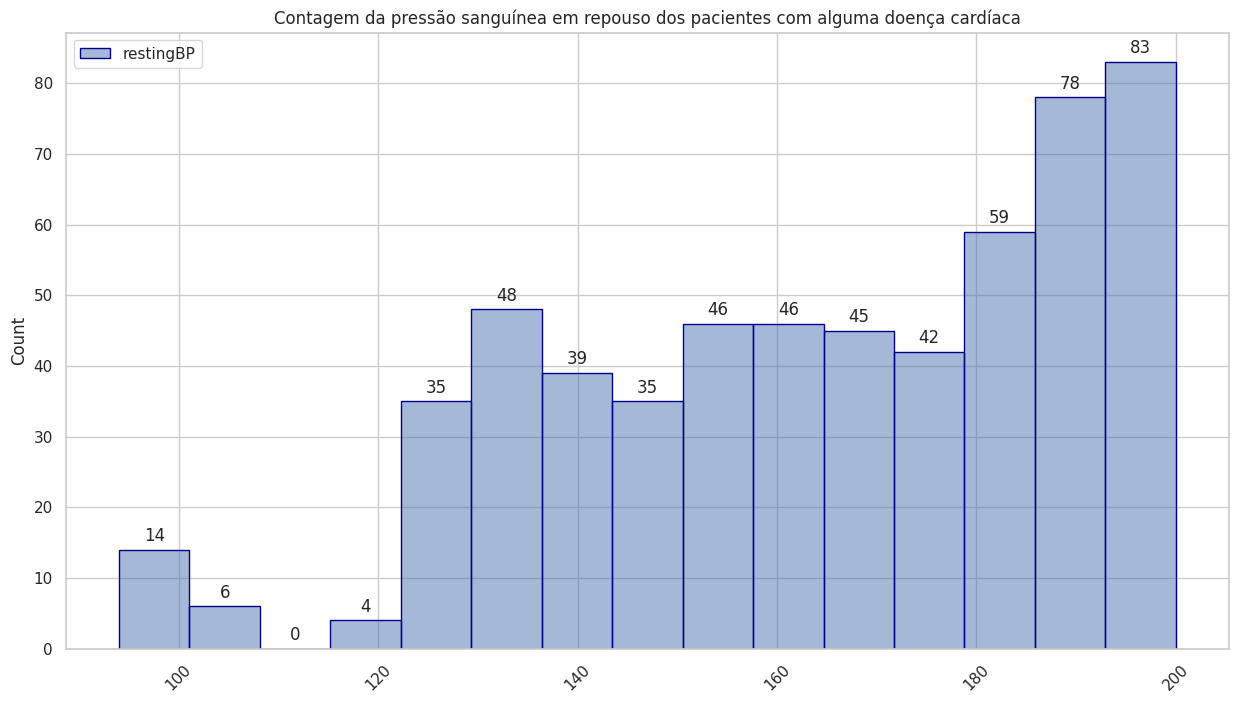

In [53]:
fig , ax = plt.subplots(figsize = (15,8))

ax = sns.histplot(pressao_sanguinea, edgecolor = 'darkblue', bins = 15)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax.set_title("Contagem da pressão sanguínea em repouso dos pacientes com alguma doença cardíaca")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45 )



Como podemos ver os dados e o gráfico de histograma da pressão sanguínea em repouso nos motra que a maioria das pessoas com doenças cardíaca está entre 190 e 200 . E o valor mais contado é 190.

A distribuição se mostra assimétrica a direta, o que condiz com os dados monstrados : moda > mediana > media .

## **Correlação**

Correlação entre todas variáveis

In [54]:
dataset.corr()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
age,1.000000,-0.024717,0.037731,-0.016126,0.035439,0.049732,0.067736,-0.040092,-0.037581,-0.026020,-0.015334,0.025407,0.008356
gender,-0.024717,1.000000,0.035402,-0.069727,-0.120759,0.023560,-0.046634,0.064606,-0.051746,0.331457,-0.051957,0.029376,0.015769
chestpain,0.037731,0.035402,1.000000,0.222267,0.174731,0.232059,0.256316,0.114496,-0.027376,0.101345,0.472731,0.285156,0.554228
restingBP,-0.016126,-0.069727,0.222267,1.000000,0.126523,0.192063,0.219887,0.095569,-0.046545,-0.004225,0.376711,0.263194,0.482387
serumcholestrol,0.035439,-0.120759,0.174731,0.126523,1.000000,0.278337,0.101767,0.038967,0.029422,-0.025910,0.165569,0.132419,0.195340
fastingbloodsugar,0.049732,0.023560,0.232059,0.192063,0.278337,1.000000,0.143982,0.096528,0.011356,0.015311,0.242734,0.182246,0.303233
restingrelectro,0.067736,-0.046634,0.256316,0.219887,0.101767,0.143982,1.000000,0.099991,-0.032489,0.040291,0.343280,0.204684,0.426837
maxheartrate,-0.040092,0.064606,0.114496,0.095569,0.038967,0.096528,0.099991,1.000000,0.015536,0.044614,0.201515,0.122763,0.228343
exerciseangia,-0.037581,-0.051746,-0.027376,-0.046545,0.029422,0.011356,-0.032489,0.015536,1.000000,-0.003296,-0.017783,-0.017513,-0.039874
oldpeak,-0.026020,0.331457,0.101345,-0.004225,-0.025910,0.015311,0.040291,0.044614,-0.003296,1.000000,0.208789,0.086992,0.098053


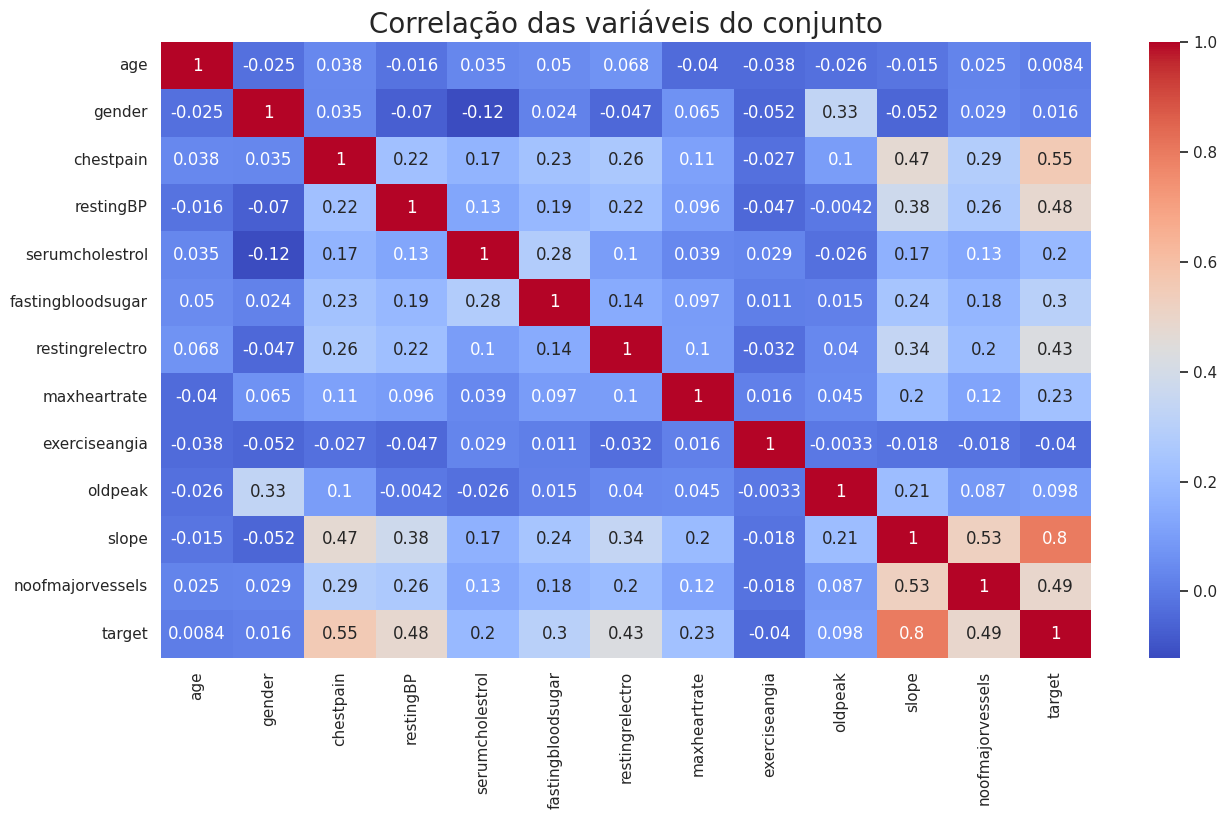

In [55]:
fig , ax = plt.subplots(figsize = (15,8))
sns.heatmap(dataset.corr() , annot=True , cmap='coolwarm')

ax.set_title('Correlação das variáveis do conjunto' , fontsize = 20)
plt.show()

### Teste de esforço do pico

Não estava previsto estudar isso, mas mediante a alta relação de "slope" com o target, de 0.8, demonstrou necessário ver esta correlação melhor. Slope é o teste de esforço com inclinação.

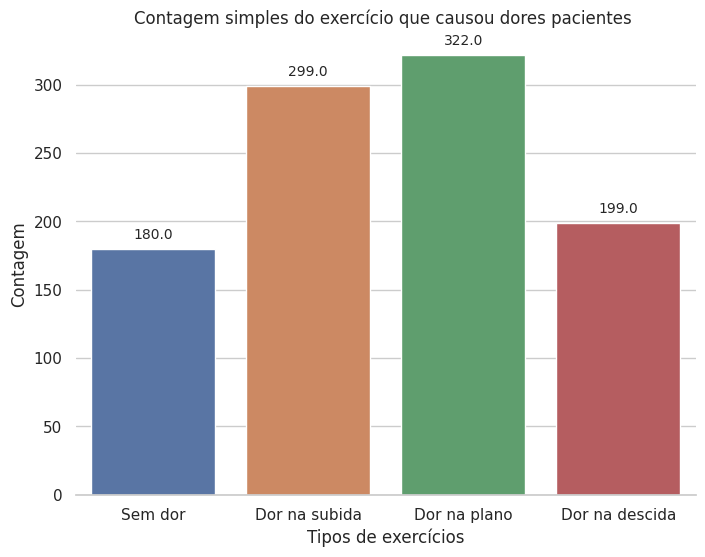

In [56]:
fig,ax= plt.subplots( figsize = (8,6))
ax = sns.countplot(x = dataset['slope'])

for p in ax.patches:  # repetição para rotular os dados
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                fontsize = 10)

ax.set_xlabel('Tipos de exercícios')
ax.set_ylabel('Contagem')

lista = list(dataset['slope'].unique())
lista.sort()

rotulos = ['Sem dor','Dor na subida','Dor na plano', 'Dor na descida']

plt.xticks(range(len(lista)) , rotulos )

ax.set_title('Contagem simples do exercício que causou dores pacientes ' )

sns.despine(top = True,
            right = True,
            left = True,
            bottom = False)


O gráfico acima nos traz a contagem do total de pacientes por tipo de
dor


---



---



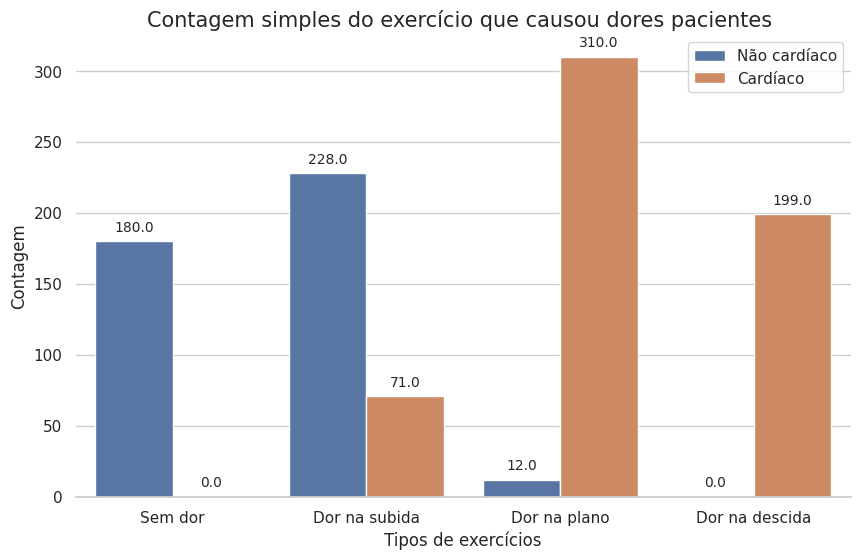

In [57]:
fig,ax= plt.subplots( figsize = (10,6))
ax = sns.countplot(x = dataset['slope'] , hue = dataset['target'] )

for p in ax.patches:  # repetição para rotular os dados
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                fontsize = 10)

ax.set_title('Contagem simples do exercício que causou dores pacientes ' , fontsize= 15 )
ax.set_xlabel('Tipos de exercícios')
ax.set_ylabel('Contagem')

lista = list(dataset['slope'].unique())
lista.sort()

rotulos = ['Sem dor','Dor na subida','Dor na plano', 'Dor na descida']

plt.xticks(range(len(lista)) , rotulos )



plt.legend(labels =['Não cardíaco' , 'Cardíaco'])

sns.despine(top = True,
            right = True,
            left = True,
            bottom = False)


O gráfico acima nos traz a contagem das pessoas por tipo de dor, e dentro desta contagem ele separam entre Cardíacos e não Cardíacos.

Impressiona a quantidade de pessoas que sentem dor no plano e tem problema cardíacos , de 322 pessoas , 310 são cardíacas.

E surpreende ainda mais a quantidade de pessoas que sentem dor na descida e são cardíacos ou tem problemas cardiovasculares, simplesmente, o total ! De 199 casos, os 199 são cardíacos


---



---



In [58]:
len(dataset[(dataset['slope'] ==3) ])  # quantidade das pessoas que tiveram dor no teste de esforço de descida

199

In [59]:
# quantidade das pessoas que tiveram dor no teste de esforço de descida E tiveram problemas cardíacos
len(dataset[(dataset['slope'] ==3) & dataset['target'] ==1])

# Ou, seja , TODOS !

199

## Normalizando DataFrame

A intenção aqui é mostrar o boxplot dos dados para podemos ter noção dos quartis, medianas e mais noção do conjunto. Para manter todos no mesmo olhar relativo, irei normalizar todas colunas .

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
normalizador = MinMaxScaler()

In [62]:
dataset_normalizado = pd.DataFrame(normalizador.fit_transform(dataset), columns=dataset.columns)

In [63]:
dataset_normalizado

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,0.550000,1.0,0.666667,0.726415,0.000000,0.0,0.5,0.580153,0.0,0.854839,1.000000,1.000000,1.0
1,0.333333,1.0,0.000000,0.000000,0.380399,0.0,0.5,0.335878,0.0,0.596774,0.333333,0.333333,0.0
2,0.483333,1.0,0.666667,0.367925,0.235880,0.0,0.0,1.000000,1.0,0.806452,0.333333,0.000000,0.0
3,0.383333,1.0,0.000000,0.415094,0.490033,1.0,0.5,0.625954,0.0,0.516129,0.666667,0.666667,1.0
4,0.183333,1.0,0.333333,0.990566,0.000000,0.0,1.0,0.496183,0.0,0.854839,1.000000,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.466667,1.0,0.666667,0.424528,0.579734,0.0,1.0,0.854962,1.0,0.903226,0.666667,0.666667,1.0
996,0.450000,1.0,1.000000,0.462264,0.428571,1.0,0.5,0.206107,1.0,0.919355,0.333333,0.000000,0.0
997,0.816667,1.0,0.000000,0.584906,0.720930,1.0,0.0,0.954198,0.0,0.225806,1.000000,0.333333,1.0
998,0.416667,1.0,0.333333,0.867925,0.692691,0.0,0.5,0.351145,1.0,0.951613,1.000000,0.666667,1.0


### Boxplot

In [64]:
dataset_normalizado = dataset_normalizado.drop('target' , axis =  1 ) # Retirando a coluna target.

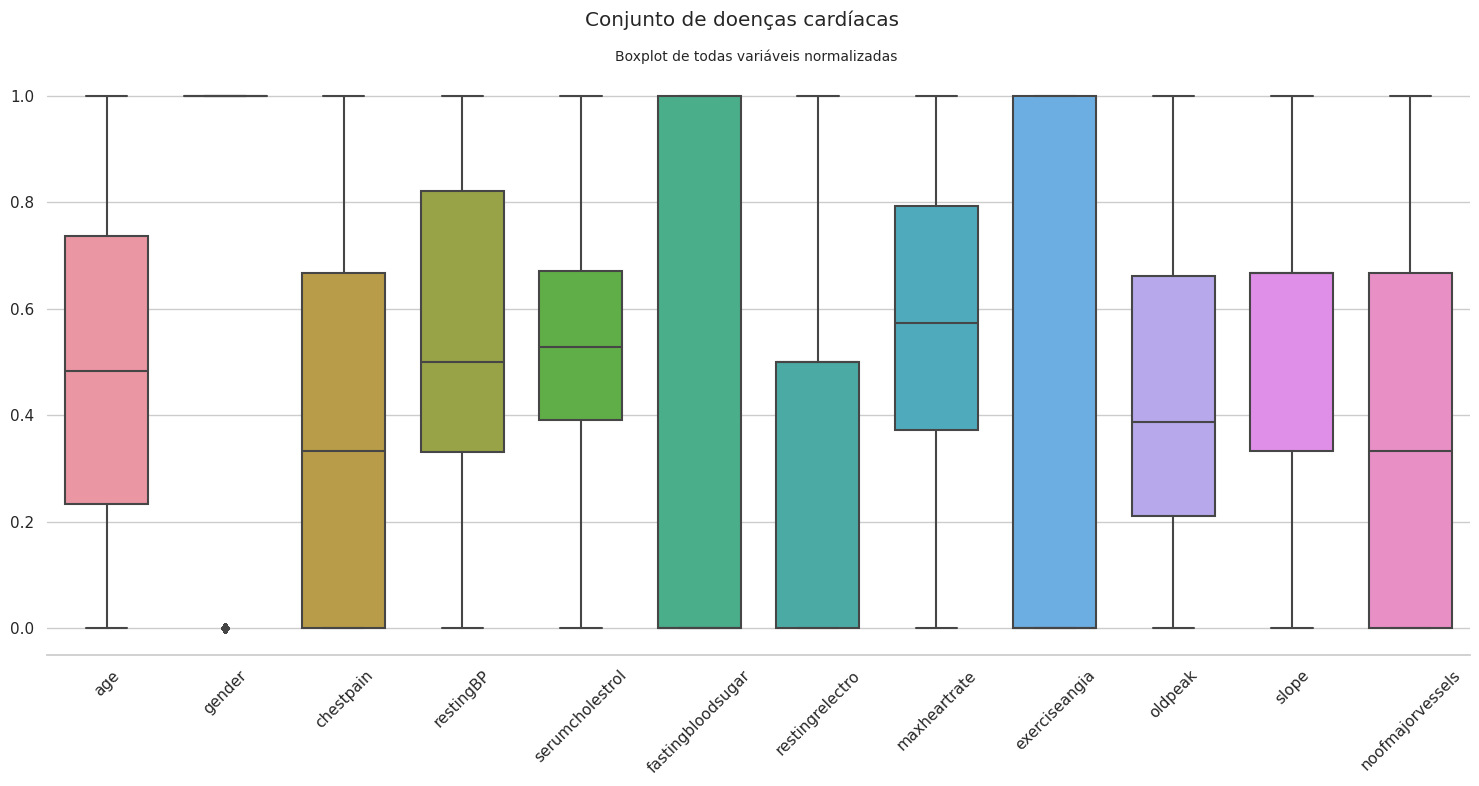

In [65]:

import warnings
sns.set(style="whitegrid")
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(figsize = (15,8))


g = sns.boxplot(dataset_normalizado , width = 0.7)

sns.despine(top = True,
            right = True,
            left = True,
            bottom = False)

plt.xticks(rotation=45)
plt.title('Boxplot de todas variáveis normalizadas ' , fontsize = 10 , ha = 'center')
plt.suptitle('Conjunto de doenças cardíacas', ha='center')

plt.tight_layout()

## Conclusão

Com base nos dados, foi possível ver que a idade entre os 40 a 50 anos é a com maior incidência de cardíacos.



---


Continuando, foi apresentado que os pacientes com níveis de colesterol alto são incidentes a terem problemas cardíacos, com incidência. No conjunto 81% dos diabéticos eram cardíacos.

---

O teste de esforço foi o que apresentou resultado impressionante, o teste em terreno plano apresentou grande correspondência com o fato do paciente ter problemas cardiovasculares e surpreendentemente o teste de descida que é quando mede o esforço e a dor do paciente apresentou 100% dos casos constantes como cardíacos. Ou seja, o quanto menos esforço o paciente fazer e ainda sim ele sentir dor , isso indica problemas cardíacos.

---

Por gênero não apresentou muita diferença do percentual do conjunto total, portanto homens e mulheres podem ter a mesma incidência de problemas cardíacos conforme o conjunto de dados.

---

Estas são as partes mais importantes que pude aferir com o conjunto de dados.


Muito obrigado !

##  **Robson Barbosa**